In [1]:
#import all libraries including visualization
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create path to project folder
path = r'C:\Users\tatal\06-2023 Instacart Basket Analysis'

In [3]:
#IMPORT part one
df_order_customer_prd = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'full_file.pkl'))

In [4]:
## reindex as I was getting error of duplicated index
df_order_customer_prd = df_order_customer_prd.reset_index()

In [4]:
df_order_customer_prd.shape

(32404859, 32)

In [5]:
df_order_customer_prd.head()

,user_id,first_name,last_name,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,...,price_range_loc,busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days_last_order,frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Busiest days,most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Regularly busy days,most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Busiest days,most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Regularly busy days,most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Least busy days,most orders,8,New customer,7.988889,Low spender,19.0,Regular customer


In [12]:
df_order_customer_prd.dtypes

user_id                     int32
first_name                 object
last_name                  object
Gender                     object
STATE                      object
Age                         int16
date_joined                object
n_dependants                 int8
fam_status                 object
income                      int32
order_id                    int32
order_number                int16
orders_day_of_week           int8
order_hour_of_day            int8
days_since_last_order     float32
product_id                  int16
add_to_cart_order           int16
reordered                    int8
product_name               object
aisle_id                    int16
department_id                int8
prices                    float32
price_range_loc            object
busiest_day                object
Busiest_days               object
busiest_period_of_day      object
max_order                   int16
loyalty_flag               object
mean_price                float32
spending_flag 

In [7]:
#create subset with just a few columns to reduce size of databse while working on it
df_select = df_order_customer_prd[['user_id','Gender', 'Age', 'n_dependants','fam_status', 'income', 'loyalty_flag', 'prices', 'order_hour_of_day','orders_day_of_week']]

In [43]:
df_select.shape

(32404859, 10)

### Task 2 - Bar chart

<Axes: >

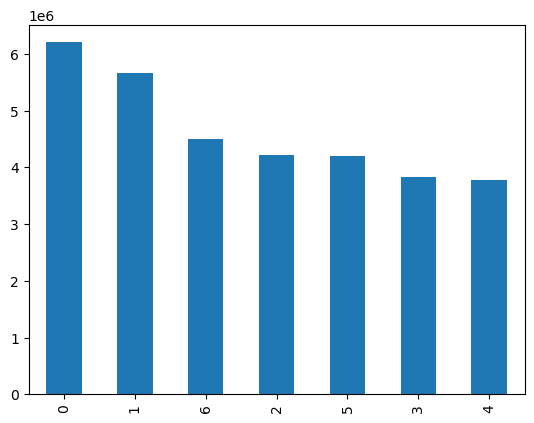

In [18]:
## Create bar chart for orders of the week
df_select['orders_day_of_week'].value_counts().plot.bar()

<Axes: >

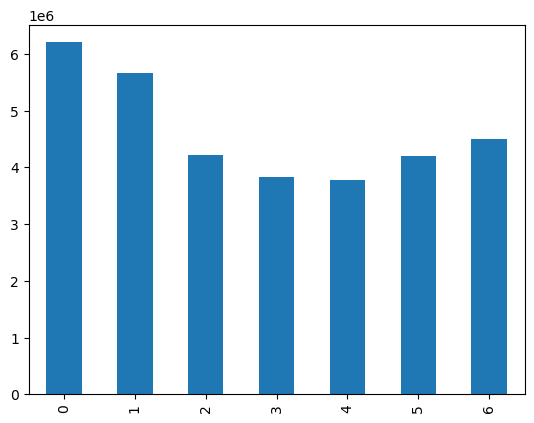

In [19]:
#arrange the graph by days of the week
df_select['orders_day_of_week'].value_counts().sort_index().plot.bar()

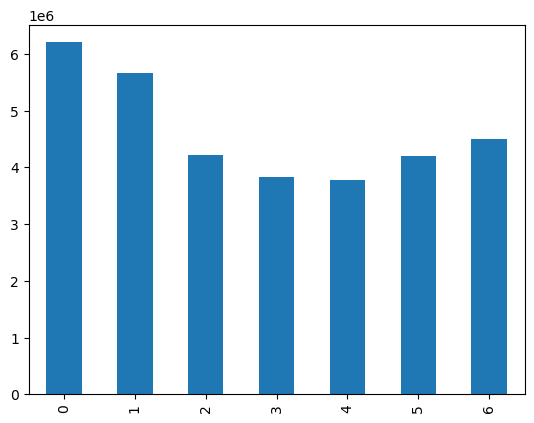

In [20]:
## Export chart fist save the chart in jupyter memory by createing "bar" object
bar_orders_week = df_select['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [21]:
#Export bar figure
bar_orders_week.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_week.png'))

## Scatterplot

<Axes: xlabel='prices', ylabel='prices'>

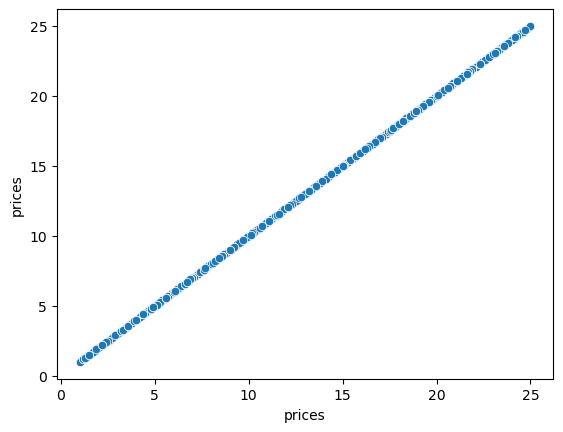

In [26]:
#scatterplot to identify outliers on price
sns.scatterplot(x = 'prices', y = 'prices',data = df_select)

## Histogram

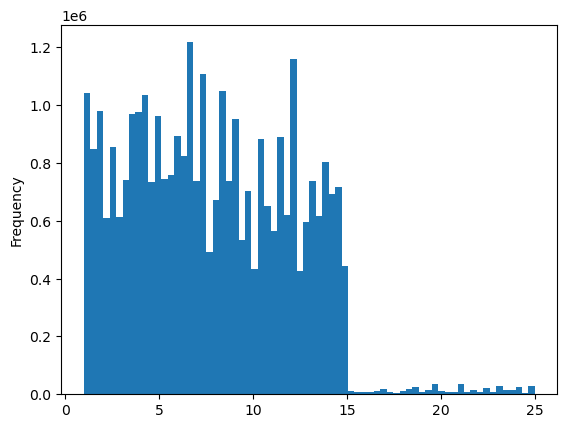

In [23]:
#histogram for pricing
hist_price = df_select['prices'].plot.hist(bins = 70)

In [24]:
#Export histogram figure
hist_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_price.png'))

## Line chart

In [44]:
#create a sample of the data - 70/30 sample
np.random.seed(4)
dev = np.random.rand(len(df_select)) <= 0.7

In [46]:
# assing the dev list to the database to create sample ## large sample
big = df_select[dev]

In [45]:
##small sample
small = df_select[~dev]

In [47]:
#check lengh original
len(df_select)

32404859

In [48]:
#check the samples
len(big) + len(small)

32404859

In [8]:
##reduce the sample to only the column necessary for the chart
df_2 = small[['orders_day_of_week','prices']]

In [11]:
df_2 = df_2.reset_index()

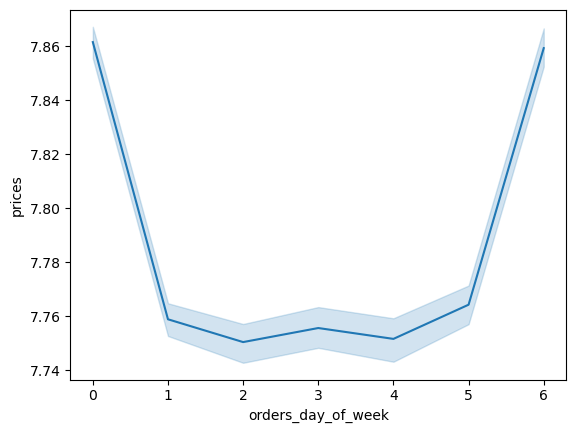

In [12]:
#create line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

## histogram of the “order_hour_of_day”

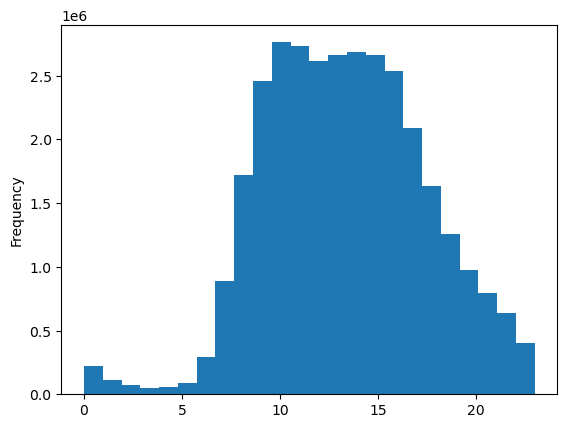

In [23]:
#histogram for order_hour_of_day
hist_hour = df_select['order_hour_of_day'].plot.hist(bins = 24)

## The histogram indicates the busiest time happen betwen 10 am and 3PM. The slowest time is from midnight to 5am

In [26]:
#Export histogram figure
hist_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_hour.png'))

## bar chart from the “loyalty_flag”

<Axes: >

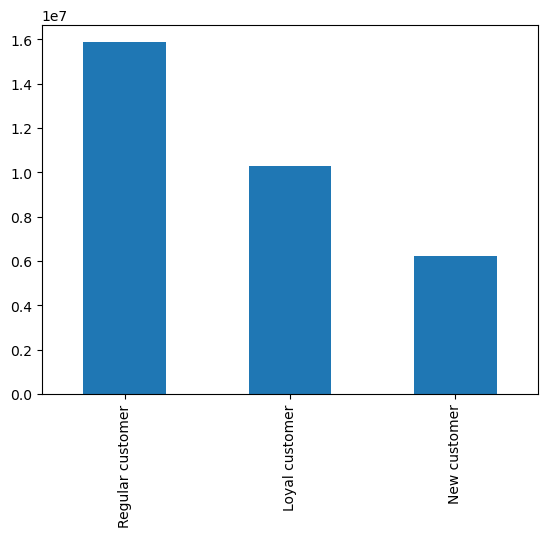

In [59]:
df_select['loyalty_flag'].value_counts().plot.bar()

In [ ]:
##Most of the customer are regular. Followed by loyal

In [27]:
#Export chart
bar_loyal.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyal.png'))

## Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

#use the "small" dabase but select the correct columns

In [34]:
##reduce the sample to only the column necessary for the chart
df_3 = small[['order_hour_of_day','prices']]

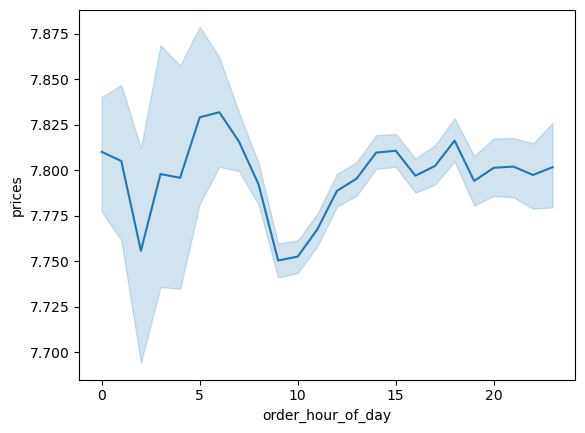

In [37]:
#create line chart
line_hour = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')

In [38]:
#Export chart
line_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hour.png'))

##there is quite a lot of variation between prices and hour of the day. 

In [36]:
df_3[df_3.index.duplicated()]

,order_hour_of_day,prices


##  line chart exploring the connections between age and number of dependents

In [63]:
##reduce the sample to only the column necessary for the chart
df_4 = small[['Age','n_dependants']]

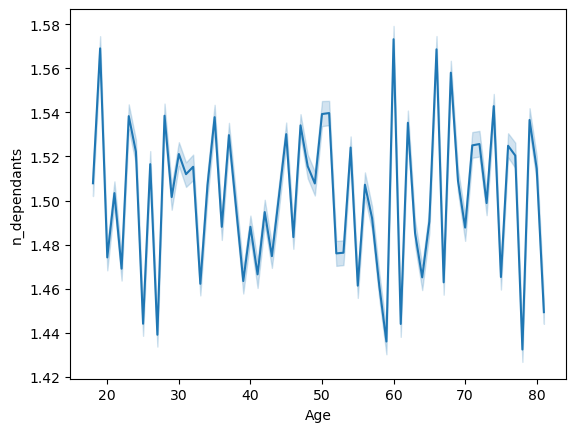

In [54]:
#create line chart
line_age = sns.lineplot(data = df_4, x = 'Age',y = 'n_dependants')

In [55]:
#Export chart
line_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age.png'))

In [ ]:
##there is no connection between age and number of dependants

In [51]:
df_4[df_4.index.duplicated()]

,Age,n_dependants


## determine whether there’s a connection between age and family situation

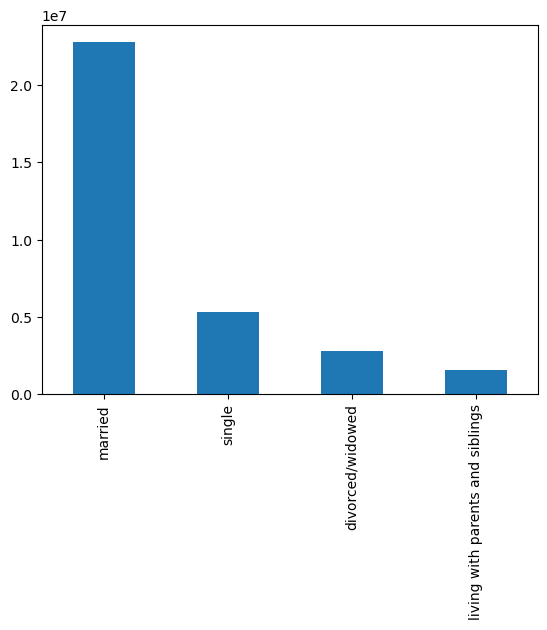

In [60]:
# Check family status of the customer - bar chart
fam_status_bar = df_select['fam_status'].value_counts().plot.bar()

In [62]:
##reduce the sample to only the column necessary for the chart
df_5 = small[['Age','fam_status']]

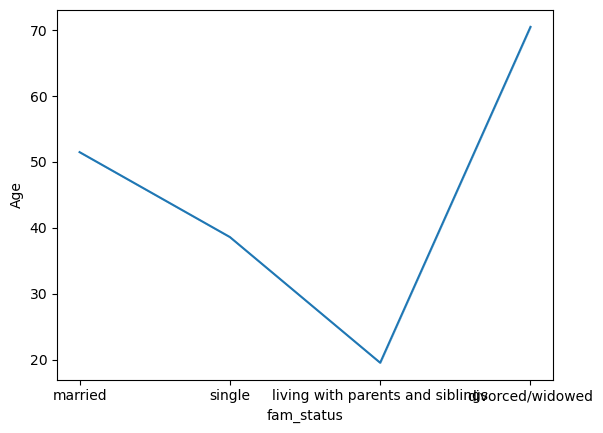

In [64]:
#create line chart
fam_age = sns.lineplot(data = df_5, x = 'fam_status',y = 'Age')

In [65]:
#Export chart
fam_status_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fam_status_bar.png'))

In [66]:
#Export chart
fam_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fam_age.png'))

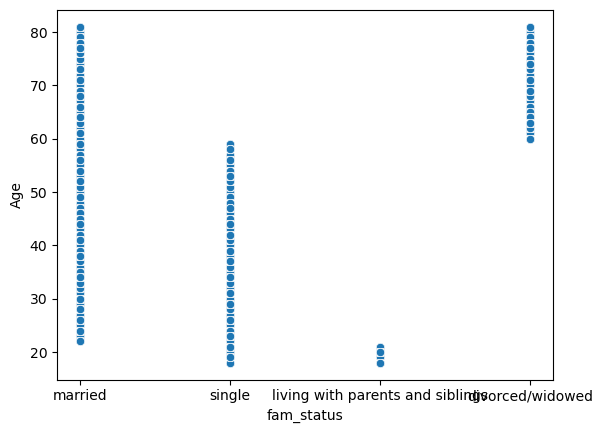

In [8]:
#scatterplot to identify outliers on price
chartfam = sns.scatterplot(x = 'fam_status', y = 'Age',data = df_select)

## Maried people can range between 20 to 80 y. Single from 20 to 60, livning with parents under 20 and windowe more than 60 yers

## connection between age and spending power (income)

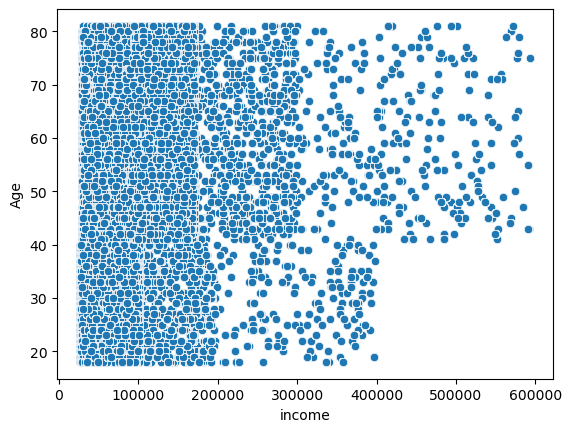

In [69]:
#scatterplot to identify outliers on price
chart2 = sns.scatterplot(x = 'income', y = 'Age',data = df_select)

In [70]:
#Export chart
chart2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_age.png'))

In [9]:
#Export chart
chartfam.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_fam_scat.png'))

## most of the customers make 100K-200K. Only people over 45 makes more than 400K

In [6]:
#export fjle
df_order_customer_prd.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'full_file_v2.pkl'))